### Plotting DOORS insitu data against cubes

This notebook serves to illustrate how to access DOORS vector data provided in data collections and how it might be used. We start with a few necessary imports.

In [1]:
from xcube_geodb.core.geodb import GeoDBClient

import matplotlib.pyplot as plt

The backbone of the geoDB is a postgres database that may be accessed via the geo db client. It requires you to state the url of the postgres service and credentials, but these may be kept as environment variables so you don't have to type them in everytime - as is the case here.

In [2]:
geodb = GeoDBClient()

We check whether the connection could be established.

In [3]:
geodb.whoami

'geodb_doors-user'

A database may contain several data collections. As the database at hand contains more than DOORS databases, we will restrict it to only show those.

In [4]:
df = geodb.get_my_collections()
df

,owner,database,collection
0,geodb_doors-io-bas-admin,aeronet-oc,Galata platform(Version 3 SEAPRISM Processing)
1,geodb_doors-io-bas-admin,aeronet-oc,Gloria platform (Version 3 SEAPRISM Processing)
2,geodb_doors-io-bas-admin,aeronet-oc,Section 7 (Version 3 SEAPRISM Processing)
3,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E1
4,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E10a1
...,...,...,...
974,geodb_doors-io-bas-admin,water-quality,ANEMONE_Nutrients_2019_2020
975,geodb_doors-io-bas-admin,water-quality,EMBLAS_CHL_2016_2019
976,geodb_doors-io-bas-admin,water-quality,EMBLAS_Nutrients_2016_2019
977,geodb_doors-io-bas-admin,water-quality,EMBLAS_Physics_2016_2019


In [5]:
df.database.unique()

array(['aeronet-oc', 'anja', 'black_sea_ARGO', 'demo', 'doors',
       'doors-io-bas', 'eea-urban-atlas', 'eodash', 'eodash_stage',
       'geodb_06907e6f-803b-40c1-aa8c-8282f7e87d4d',
       'geodb_0b01bfcd-2d09-46f8-84e8-cb5720fba14c',
       'geodb_0d6df427-8c09-41b9-abc9-64ce13a68125',
       'geodb_0e5d743f-2134-4561-8946-a073b039176f',
       'geodb_2cb121fa-cb11-49c5-99d8-7f0d8113656b',
       'geodb_5d712007-3a9e-47b3-bf93-16a6ee2e1cb8',
       'geodb_a2b85af8-6b99-4fa2-acf6-e87d74e40431',
       'geodb_a659367d-04c2-44ff-8563-cb488da309e4',
       'geodb_b34bfae7-9265-4a3e-b921-06549d3c6035', None,
       'geodb_c8ce99d8-d1ac-426a-9de1-d37b2dcae792', 'geodb_ciuser',
       'geodb_d2c4722a-cc19-4ec1-b575-0cdb6876d4a7',
       'geodb_fd3df931-a78a-4ba9-b4d4-4da1606125fd', 'geodb_geodb_ci',
       'hh_ger_stationdata_hu', 'io-bas', 'lpis_iacs',
       'madagascar_adm_boundaries', 'phi_week', 'polar', 'public',
       'stac_test', 'test_duplicate', 'water-quality'], dtype=object)

In [ ]:
public_collections = df[df["database"].str.contains("doors")==True]

,owner,database,collection
966,geodb_admin,public,land_use


In [6]:
df = geodb.get_my_collections()
doors_collections = df[df["database"].str.contains("doors")==True]
doors_collections

,owner,database,collection
53,geodb_geodb_doors-admin,doors,BG_Coastal
54,geodb_geodb_doors-admin,doors,BG_eez
55,geodb_geodb_doors-admin,doors,BG_Open
56,geodb_geodb_doors-admin,doors,BG_Shelf
57,geodb_geodb_doors-admin,doors,BSWQDB_1
58,geodb_geodb_doors-admin,doors,bulgarian_black_sea
59,geodb_geodb_doors-admin,doors,danube_delta
60,geodb_geodb_doors-admin,doors,eez
61,geodb_geodb_doors-admin,doors,GE_eez
62,geodb_doors-io-bas-admin,doors-io-bas,moorings_Varna_Lake_buoy_GM111


We could continue opening each dataset separately and browse it contents. The following function is a helper to quickly discover datasets that contain certain variables.

In [7]:
def find_collections_with_var(var_name: str, database: str = 'doors'):
    for index, collection_row in doors_collections.iterrows():
        if collection_row['database'] != database:
            continue
        gdf = geodb.get_collection(collection_row.collection, database=database)
        for column in list(gdf.columns):
            if var_name in column:
                print(f'{collection_row.collection}: {column}')

We may use it to search for, e.g., salinity.

In [8]:
find_collections_with_var('salinity')

BSWQDB_1: salinity [‰]
varna-lake-19-09-2022: salinity


We pick the first one of these for a closer look.

In [9]:
gdf = geodb.get_collection('BSWQDB_1', database="doors")
gdf

,id,created_at,modified_at,geometry,cruise,station,longitude,latitude,date,station depth [m],sampling depth [m],salinity [‰],temperature [°c],timestamp
0,1,2022-11-11T08:35:10.028447+00:00,None,POINT (31.71050 43.75380),JOSS GE-UA 2016,JOSS GE-UA - 1,31.7105,43.7538,24.5.2016,1702.0,0.0,18.159,18.040,2016-05-24 12:00:00
1,2,2022-11-11T08:35:10.028447+00:00,None,POINT (31.71050 43.75380),JOSS GE-UA 2016,JOSS GE-UA - 1,31.7105,43.7538,24.5.2016,1702.0,8.2,18.304,17.040,2016-05-24 12:00:00
2,3,2022-11-11T08:35:10.028447+00:00,None,POINT (31.71050 43.75380),JOSS GE-UA 2016,JOSS GE-UA - 1,31.7105,43.7538,24.5.2016,1702.0,44.5,18.474,8.780,2016-05-24 12:00:00
3,4,2022-11-11T08:35:10.028447+00:00,None,POINT (31.71050 43.75380),JOSS GE-UA 2016,JOSS GE-UA - 1,31.7105,43.7538,24.5.2016,1702.0,59.8,19.600,8.580,2016-05-24 12:00:00
4,5,2022-11-11T08:35:10.028447+00:00,None,POINT (31.71050 43.75380),JOSS GE-UA 2016,JOSS GE-UA - 1,31.7105,43.7538,24.5.2016,1702.0,99.3,20.576,8.670,2016-05-24 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2346,2022-11-11T08:35:10.528311+00:00,None,POINT (41.21960 41.78360),JBSS GE-UA 2019,JBSS GE-UA - 12,41.2196,41.7836,3.8.2019,1169.0,174.0,20.701,8.656,2019-08-03 12:00:00
2346,2347,2022-11-11T08:35:10.528311+00:00,None,POINT (41.21960 41.78360),JBSS GE-UA 2019,JBSS GE-UA - 12,41.2196,41.7836,3.8.2019,1169.0,300.0,NaN,8.703,2019-08-03 12:00:00
2347,2348,2022-11-11T08:35:10.528311+00:00,None,POINT (39.88100 42.23570),JBSS GE-UA 2019,JBSS GE-UA - 9,39.8810,42.2357,2.8.2019,1956.0,140.0,20.875,8.726,2019-08-02 12:00:00
2348,2349,2022-11-11T08:35:10.528311+00:00,None,POINT (40.33690 42.11370),JBSS GE-UA 2019,JBSS GE-UA - 10,40.3369,42.1137,3.8.2019,1814.0,153.0,21.006,8.739,2019-08-03 12:00:00


The data collection looks good, but is quite large. One thing to notice is that it provides measurements at different sampling depths. It makes sense to focus on mesaurements taken at the same depth.

In [10]:
bswqdb_surface_gdf = gdf[gdf['sampling depth [m]'] == 0.0]
bswqdb_surface_gdf

,id,created_at,modified_at,geometry,cruise,station,longitude,latitude,date,station depth [m],sampling depth [m],salinity [‰],temperature [°c],timestamp
0,1,2022-11-11T08:35:10.028447+00:00,None,POINT (31.71050 43.75380),JOSS GE-UA 2016,JOSS GE-UA - 1,31.7105,43.7538,24.5.2016,1702.0,0.0,18.159,18.040,2016-05-24 12:00:00
5,6,2022-11-11T08:35:10.028447+00:00,None,POINT (31.74900 43.55370),JOSS GE-UA 2016,JOSS GE-UA - 2,31.7490,43.5537,24.5.2016,1853.0,0.0,18.358,19.400,2016-05-24 12:00:00
6,7,2022-11-11T08:35:10.028447+00:00,None,POINT (31.83320 43.36750),JOSS GE-UA 2016,JOSS GE-UA - 3,31.8332,43.3675,24.5.2016,1933.0,0.0,18.225,18.050,2016-05-24 12:00:00
16,17,2022-11-11T08:35:10.028447+00:00,None,POINT (32.57310 43.36570),JOSS GE-UA 2016,JOSS GE-UA - 4,32.5731,43.3657,24.5.2016,2032.0,0.0,18.228,17.600,2016-05-24 12:00:00
21,22,2022-11-11T08:35:10.028447+00:00,None,POINT (40.11360 42.17710),JOSS GE-UA 2016,JOSS GE-UA - 5,40.1136,42.1771,26.5.2016,1855.0,0.0,17.860,NaN,2016-05-26 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,2290,2022-11-11T08:35:10.528311+00:00,None,POINT (36.05860 43.53840),JBSS GE-UA 2019,JBSS GE-UA - 8,36.0586,43.5384,1.8.2019,2168.0,0.0,18.892,25.956,2019-08-01 12:00:00
2303,2304,2022-11-11T08:35:10.528311+00:00,None,POINT (39.88100 42.23570),JBSS GE-UA 2019,JBSS GE-UA - 9,39.8810,42.2357,2.8.2019,1956.0,0.0,18.318,27.121,2019-08-02 12:00:00
2313,2314,2022-11-11T08:35:10.528311+00:00,None,POINT (40.33690 42.11370),JBSS GE-UA 2019,JBSS GE-UA - 10,40.3369,42.1137,3.8.2019,1814.0,0.0,NaN,8.838,2019-08-03 12:00:00
2325,2326,2022-11-11T08:35:10.528311+00:00,None,POINT (40.83670 41.93310),JBSS GE-UA 2019,JBSS GE-UA - 11,40.8367,41.9331,3.8.2019,1544.2,0.0,NaN,8.730,2019-08-03 12:00:00


Now there are other issues with respect to some of the columns: The `modified_at` column is empty, `sampling depth [m]` is now obsolete, and the information in `geometry` is better conveyed in the `latitude` and `longitude` columns. So we will get rid of them.

In [11]:
bswqdb_surface_gdf = bswqdb_surface_gdf.drop(columns=['modified_at', 'sampling depth [m]', 'geometry'])

We may then write out the collection to a file which allows us to read it into the xcube viewer.

In [12]:
with open('bswqdg_surface.csv', 'w') as gjreg:
    gjreg.write(bswqdb_surface_gdf.to_csv(index=False))

We can do the same thing for another variable, e.g., chlorophyll.

In [13]:
find_collections_with_var('chl')

danube_delta: chl-a[mg/m3]
varna-lake-19-09-2022: chlorophyll a mg/m3


It is the second time the `varna-lake` collection is recommended, so we open that one.

In [14]:
varna_lake_gdf = geodb.get_collection('varna-lake-19-09-2022', database="doors")
varna_lake_gdf

,id,created_at,modified_at,geometry,station,latitude,longitude,data,time,sampling depth m,...,"do, mg/l","tn, µg/l","n-no3, µg/l","n-no2, µg/l","n-nh4, µg/l","tp, µg/l","ip, µg/l","si, µg/l",chlorophyll a mg/m3,timestamp
0,1,2022-11-15T09:38:14.424273+00:00,None,POINT (27.87660 43.20220),St. 1,43.2022,27.8766,19.9.2022,15:10:00,0,...,7.85,873.87,62.39,26.41,11.70,58.30,53.92,63.13,22.04,2022-09-19 15:10:00
1,2,2022-11-15T09:38:14.424273+00:00,None,POINT (27.87660 43.20220),St. 1,43.2022,27.8766,19.9.2022,15:10:00,6,...,6.34,373.13,26.19,28.16,10.93,61.32,55.67,79.42,14.92,2022-09-19 15:10:00
2,3,2022-11-15T09:38:14.424273+00:00,None,POINT (27.87660 43.20220),St. 1,43.2022,27.8766,19.9.2022,15:10:00,16,...,7.07,428.69,28.09,16.21,4.92,90.38,27.05,213.85,8.29,2022-09-19 15:10:00
3,4,2022-11-15T09:38:14.424273+00:00,None,POINT (27.85720 43.19350),St. 2,43.1935,27.8572,19.9.2022,13:50:00,0,...,8.64,816.77,49.42,24.66,8.67,100.07,45.74,45.47,27.92,2022-09-19 13:50:00
4,5,2022-11-15T09:38:14.424273+00:00,None,POINT (27.85720 43.19350),St. 2,43.1935,27.8572,19.9.2022,13:50:00,6,...,6.79,863.59,59.55,25.54,6.39,85.23,51.00,49.55,28.38,2022-09-19 13:50:00
5,6,2022-11-15T09:38:14.424273+00:00,None,POINT (27.85720 43.19350),St. 2,43.1935,27.8572,19.9.2022,13:50:00,13,...,6.15,427.31,21.10,20.00,6.43,59.20,35.52,163.61,13.99,2022-09-19 13:50:00
6,7,2022-11-15T09:38:14.424273+00:00,None,POINT (27.83240 43.18840),St. 3,43.1884,27.8324,19.9.2022,12:15:00,0,...,6.37,822.50,94.71,34.87,6.40,101.88,53.63,126.95,26.25,2022-09-19 12:15:00
7,8,2022-11-15T09:38:14.424273+00:00,None,POINT (27.83240 43.18840),St. 3,43.1884,27.8324,19.9.2022,12:15:00,6,...,5.70,522.14,62.87,29.04,7.15,93.71,54.79,91.64,24.65,2022-09-19 12:15:00
8,9,2022-11-15T09:38:14.424273+00:00,None,POINT (27.83240 43.18840),St. 3,43.1884,27.8324,19.9.2022,12:15:00,13,...,6.51,730.04,48.30,23.21,5.66,68.28,39.32,133.74,16.61,2022-09-19 12:15:00
9,10,2022-11-15T09:38:14.424273+00:00,None,POINT (27.80020 43.19310),St. 4,43.1931,27.8002,19.9.2022,10:50:00,0,...,6.15,776.13,120.26,34.28,8.65,107.63,59.76,273.60,42.66,2022-09-19 10:50:00


Again, we want to only consider measurements taken at the surface.

In [15]:
varna_lake_surface_gdf = varna_lake_gdf[varna_lake_gdf['sampling depth m'] == 0]
varna_lake_surface_gdf

,id,created_at,modified_at,geometry,station,latitude,longitude,data,time,sampling depth m,...,"do, mg/l","tn, µg/l","n-no3, µg/l","n-no2, µg/l","n-nh4, µg/l","tp, µg/l","ip, µg/l","si, µg/l",chlorophyll a mg/m3,timestamp
0,1,2022-11-15T09:38:14.424273+00:00,None,POINT (27.87660 43.20220),St. 1,43.2022,27.8766,19.9.2022,15:10:00,0,...,7.85,873.87,62.39,26.41,11.70,58.30,53.92,63.13,22.04,2022-09-19 15:10:00
3,4,2022-11-15T09:38:14.424273+00:00,None,POINT (27.85720 43.19350),St. 2,43.1935,27.8572,19.9.2022,13:50:00,0,...,8.64,816.77,49.42,24.66,8.67,100.07,45.74,45.47,27.92,2022-09-19 13:50:00
6,7,2022-11-15T09:38:14.424273+00:00,None,POINT (27.83240 43.18840),St. 3,43.1884,27.8324,19.9.2022,12:15:00,0,...,6.37,822.50,94.71,34.87,6.40,101.88,53.63,126.95,26.25,2022-09-19 12:15:00
9,10,2022-11-15T09:38:14.424273+00:00,None,POINT (27.80020 43.19310),St. 4,43.1931,27.8002,19.9.2022,10:50:00,0,...,6.15,776.13,120.26,34.28,8.65,107.63,59.76,273.60,42.66,2022-09-19 10:50:00
12,13,2022-11-15T09:38:14.424273+00:00,None,POINT (27.78120 43.19140),St. 5,43.1914,27.7812,19.9.2022,9:00:00,0,...,5.50,908.11,97.65,28.16,10.93,102.49,53.33,219.28,45.38,2022-09-19 09:00:00


... drop those columns again ...

In [16]:
varna_lake_surface_gdf = varna_lake_surface_gdf.drop(columns=['modified_at', 'sampling depth m', 'geometry'])

... and assign a new column that may be used to group those values nicely.

In [17]:
varna_lake_surface_gdf['system'] = 'Varna Lake'

Now the collection is ready to be written out.

In [18]:
with open('varna_lake_surface.csv', 'w') as gjreg:
    gjreg.write(varna_lake_surface_gdf.to_csv(index=False))

Finally, we consider that danube delta collection.

In [23]:
danube_delta_gdf = geodb.get_collection('danube_delta', database="doors")
danube_delta_gdf

,id,created_at,modified_at,geometry,system,station,date[dd/mm/yyyy],time_utc,latitude,longitude,...,rrs_944 (sr-1),rrs_945 (sr-1),rrs_946 (sr-1),rrs_947 (sr-1),rrs_948 (sr-1),rrs_949 (sr-1),rrs_950 (sr-1),rrs_951 (sr-1),rrs_952 (sr-1),rrs_953 (sr-1)
0,1,2023-01-20T00:43:55.475935+00:00,None,POINT (28.89795 45.17907),Danue Delta,DN001,2015-07-28,14:34:00,45.179067,28.89795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2023-01-20T00:43:55.475935+00:00,None,POINT (28.88453 45.18877),Danue Delta,DN002,2015-07-28,15:11:00,45.188767,28.884533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2023-01-20T00:43:55.475935+00:00,None,POINT (28.92742 45.19035),Danue Delta,DN003,2015-07-28,16:13:00,45.19035,28.927417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2023-01-20T00:43:55.475935+00:00,None,POINT (29.36060 45.17592),Danue Delta,DN004,2015-07-28,19:17:00,45.175917,29.3606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2023-01-20T00:43:55.475935+00:00,None,POINT (29.35077 45.17880),Danue Delta,DN005,2015-07-28,20:16:00,45.1788,29.350767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,2023-01-20T00:43:55.475935+00:00,None,POINT (30.12503 44.25166),Danue Delta,S006,2016-05-11,00:00:00,44.25166,30.12503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,104,2023-01-20T00:43:55.475935+00:00,None,POINT (30.12588 44.34474),Danue Delta,T016,2016-05-11,07:47:51.84,44.344742,30.12588,...,0.00007,0.000069,0.000069,0.00007,0.000073,0.000077,0.000082,0.000087,0.000093,0.000097
104,105,2023-01-20T00:43:55.475935+00:00,None,POINT (30.12117 44.45186),Danue Delta,T017,2016-05-11,08:11:51.524,44.451862,30.121172,...,0.000139,0.000137,0.000136,0.000134,0.000134,0.000133,0.000134,0.000134,0.000134,0.000135
105,106,2023-01-20T00:43:55.475935+00:00,None,POINT EMPTY,Danue Delta,T018,2016-05-11,00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This one has a very large number of columns with reflectance values. We remove those, as we are not interested in them.

In [24]:
danube_delta_gdf = danube_delta_gdf[[column for column in list(danube_delta_gdf.columns) if 'rrs' not in column]]
danube_delta_gdf

,id,created_at,modified_at,geometry,system,station,date[dd/mm/yyyy],time_utc,latitude,longitude,environment,sampling_depth[m],chl-a[mg/m3],tsm[g/m3],secchi_disk_depth[m],fp_passflag,deltacor_method,deltacor_flag,delta,instrument
0,1,2023-01-20T00:43:55.475935+00:00,None,POINT (28.89795 45.17907),Danue Delta,DN001,2015-07-28,14:34:00,45.179067,28.89795,Channel,Surface,17.7154,6.977778,2,NaN,NaN,NaN,NaN,HyperSAS
1,2,2023-01-20T00:43:55.475935+00:00,None,POINT (28.88453 45.18877),Danue Delta,DN002,2015-07-28,15:11:00,45.188767,28.884533,Channel,Surface,15.240022,6.58889,2,NaN,NaN,NaN,NaN,HyperSAS
2,3,2023-01-20T00:43:55.475935+00:00,None,POINT (28.92742 45.19035),Danue Delta,DN003,2015-07-28,16:13:00,45.19035,28.927417,Channel,Surface,15.030156,6.388889,1.5,NaN,NaN,NaN,NaN,HyperSAS
3,4,2023-01-20T00:43:55.475935+00:00,None,POINT (29.36060 45.17592),Danue Delta,DN004,2015-07-28,19:17:00,45.175917,29.3606,Channel,Surface,16.678633,6.71111,1,NaN,Jiang_2020,0,0.004163,HyperSAS
4,5,2023-01-20T00:43:55.475935+00:00,None,POINT (29.35077 45.17880),Danue Delta,DN005,2015-07-28,20:16:00,45.1788,29.350767,Channel,Surface,69.9819,8.06667,1,NaN,Jiang_2020,0,-0.002081,HyperSAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,2023-01-20T00:43:55.475935+00:00,None,POINT (30.12503 44.25166),Danue Delta,S006,2016-05-11,00:00:00,44.25166,30.12503,Prodelta/offshore,2,0.676936,0.036667,NaN,NaN,NaN,NaN,NaN,TriOS
103,104,2023-01-20T00:43:55.475935+00:00,None,POINT (30.12588 44.34474),Danue Delta,T016,2016-05-11,07:47:51.84,44.344742,30.12588,Prodelta/offshore,2,1.896075,2.37,NaN,8,Jiang_2020,0,-0.000071,TriOS
104,105,2023-01-20T00:43:55.475935+00:00,None,POINT (30.12117 44.45186),Danue Delta,T017,2016-05-11,08:11:51.524,44.451862,30.121172,Prodelta/offshore,2,2.91617,4.87,NaN,53,Jiang_2020,0,-0.000166,TriOS
105,106,2023-01-20T00:43:55.475935+00:00,None,POINT EMPTY,Danue Delta,T018,2016-05-11,00:00:00,NaN,NaN,Prodelta/offshore,2,2.789519,2.406667,NaN,NaN,NaN,NaN,NaN,TriOS


This is better. We can now continue with this collection as with the ones above.

In [25]:
danube_delta_surface_gdf = danube_delta_gdf[danube_delta_gdf['sampling_depth[m]'] == 'Surface ']
danube_delta_surface_gdf = danube_delta_surface_gdf.drop(columns=['modified_at', 'geometry'])
danube_delta_surface_gdf

,id,created_at,system,station,date[dd/mm/yyyy],time_utc,latitude,longitude,environment,sampling_depth[m],chl-a[mg/m3],tsm[g/m3],secchi_disk_depth[m],fp_passflag,deltacor_method,deltacor_flag,delta,instrument
0,1,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN001,2015-07-28,14:34:00,45.179067,28.89795,Channel,Surface,17.7154,6.977778,2,NaN,NaN,NaN,NaN,HyperSAS
1,2,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN002,2015-07-28,15:11:00,45.188767,28.884533,Channel,Surface,15.240022,6.58889,2,NaN,NaN,NaN,NaN,HyperSAS
2,3,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN003,2015-07-28,16:13:00,45.19035,28.927417,Channel,Surface,15.030156,6.388889,1.5,NaN,NaN,NaN,NaN,HyperSAS
3,4,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN004,2015-07-28,19:17:00,45.175917,29.3606,Channel,Surface,16.678633,6.71111,1,NaN,Jiang_2020,0,0.004163,HyperSAS
4,5,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN005,2015-07-28,20:16:00,45.1788,29.350767,Channel,Surface,69.9819,8.06667,1,NaN,Jiang_2020,0,-0.002081,HyperSAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN075,2016-06-01,09:45:00,44.72722,28.89677,Lagoon,Surface,6.164837,11.93333,0.92,7,Jiang_2020,0,-0.000416,TriOS
75,76,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN076,2016-06-01,10:58:00,44.7179,28.83668,Lagoon,Surface,7.019971,10.86667,1,1,Jiang_2020,0,0.000089,TriOS
76,77,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN077,2016-06-02,09:21:00,45.02959,29.26631,Channel,Surface,4.633421,54.166667,0.3,NaN,NaN,NaN,NaN,TriOS
77,78,2023-01-20T00:43:55.475935+00:00,Danue Delta,DN078,2016-06-02,09:50:00,45.05004,29.18538,Channel,Surface,15.622444,37.555556,0.3,NaN,NaN,NaN,NaN,TriOS


This collection has a peculiarity, as the time is not well given. Let's create a new colum timestamp that can be used by the xcube viewer.

In [26]:
danube_delta_surface_gdf['timestamp'] = danube_delta_surface_gdf['date[dd/mm/yyyy]'] + ' ' + danube_delta_surface_gdf['time_utc']

... and use the opportunity to fix that small typo.

In [28]:
danube_delta_surface_gdf['system'] = 'Danube Delta'
danube_delta_surface_gdf

,id,created_at,system,station,date[dd/mm/yyyy],time_utc,latitude,longitude,environment,sampling_depth[m],chl-a[mg/m3],tsm[g/m3],secchi_disk_depth[m],fp_passflag,deltacor_method,deltacor_flag,delta,instrument,timestamp
0,1,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN001,2015-07-28,14:34:00,45.179067,28.89795,Channel,Surface,17.7154,6.977778,2,NaN,NaN,NaN,NaN,HyperSAS,2015-07-28 14:34:00
1,2,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN002,2015-07-28,15:11:00,45.188767,28.884533,Channel,Surface,15.240022,6.58889,2,NaN,NaN,NaN,NaN,HyperSAS,2015-07-28 15:11:00
2,3,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN003,2015-07-28,16:13:00,45.19035,28.927417,Channel,Surface,15.030156,6.388889,1.5,NaN,NaN,NaN,NaN,HyperSAS,2015-07-28 16:13:00
3,4,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN004,2015-07-28,19:17:00,45.175917,29.3606,Channel,Surface,16.678633,6.71111,1,NaN,Jiang_2020,0,0.004163,HyperSAS,2015-07-28 19:17:00
4,5,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN005,2015-07-28,20:16:00,45.1788,29.350767,Channel,Surface,69.9819,8.06667,1,NaN,Jiang_2020,0,-0.002081,HyperSAS,2015-07-28 20:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN075,2016-06-01,09:45:00,44.72722,28.89677,Lagoon,Surface,6.164837,11.93333,0.92,7,Jiang_2020,0,-0.000416,TriOS,2016-06-01 09:45:00
75,76,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN076,2016-06-01,10:58:00,44.7179,28.83668,Lagoon,Surface,7.019971,10.86667,1,1,Jiang_2020,0,0.000089,TriOS,2016-06-01 10:58:00
76,77,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN077,2016-06-02,09:21:00,45.02959,29.26631,Channel,Surface,4.633421,54.166667,0.3,NaN,NaN,NaN,NaN,TriOS,2016-06-02 09:21:00
77,78,2023-01-20T00:43:55.475935+00:00,Danube Delta,DN078,2016-06-02,09:50:00,45.05004,29.18538,Channel,Surface,15.622444,37.555556,0.3,NaN,NaN,NaN,NaN,TriOS,2016-06-02 09:50:00


Now the collection is ready to be written.

In [29]:
with open('danube_delta_surface.csv', 'w') as gjreg:
    gjreg.write(danube_delta_surface_gdf.to_csv(index=False))

To display the collection's content, we can plot it.

<AxesSubplot:>

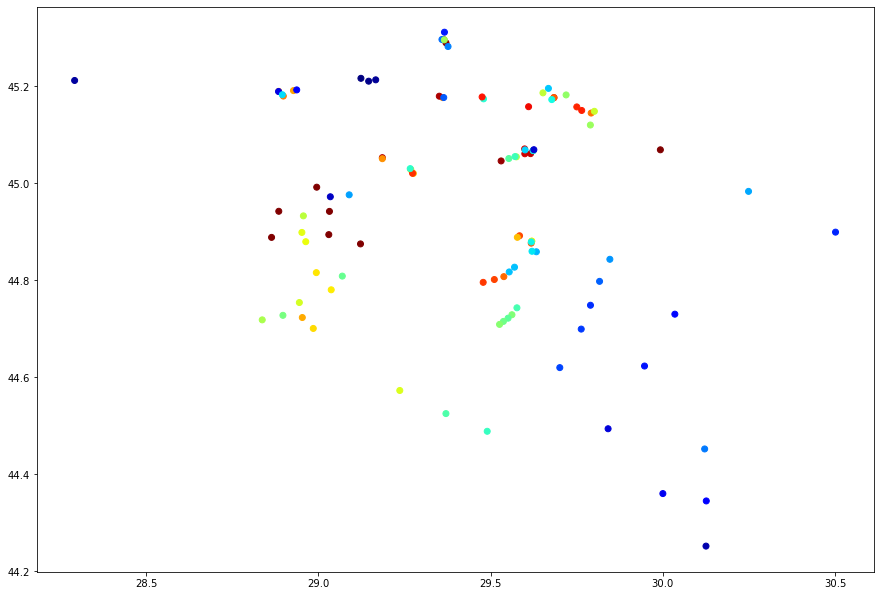

In [30]:
danube_delta_gdf.plot(column="chl-a[mg/m3]", figsize=(15,15), cmap='jet')

We can also plot the insitu data against cube data. Let us see what we have there.

In [31]:
from xcube.core.store import new_data_store

data_store = new_data_store(
    "s3",
    root="doors-cubes/blacksea/",
    max_depth=2
)

data_ids = data_store.list_data_ids()
data_ids

['CMEMS_OC_BS_4-60x133x258.zarr',
 'CMEMS_OC_BS_4.zarr',
 'bs-cmcc-sal-rean-d_1653925405736-30x215x295.zarr',
 'bs-cmcc-sal-rean-d_1653925405736.zarr',
 'cmems_SST_BS_SST_L4_REP_OBSERVATIONS_010_022_1653926779692-40x200x321.zarr',
 'cmems_SST_BS_SST_L4_REP_OBSERVATIONS_010_022_1653926779692.zarr',
 'hroc-l4m-blk-100m-v1-29x256x256.zarr',
 'hroc-l4m-blk-100m-v1.levels',
 'hroc-l4m-blk-100m-v1.zarr']

We pick the cmems chlorophyll dataset.

In [32]:
cmems_ds = data_store.open_data('CMEMS_OC_BS_4.zarr')
cmems_ds

<xarray.Dataset>
Dimensions:  (time: 794, lat: 399, lon: 774)
Coordinates:
  * lat      (lat) float64 40.02 40.04 40.06 40.08 ... 47.92 47.94 47.96 47.98
  * lon      (lon) float64 26.52 26.54 26.56 26.58 ... 41.92 41.94 41.96 41.98
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2021-03-15
Data variables:
    CHL      (time, lat, lon) float64 dask.array<chunksize=(1, 399, 512), meta=np.ndarray>
Attributes: (12/52)
    Conventions:                CF-1.7
    citation:                    
    cmems_product_id:           OCEANCOLOUR_BS_CHL_L4_NRT_OBSERVATIONS_009_045
    cmems_production_unit:      OC-CNR-ROMA-IT
    comment:                     
    contact:                    technical@gos.artov.isac.cnr.it
    ...                         ...
    start_date:                 2021-03-15
    start_time:                 08:00:00 UTC
    stop_date:                  2021-03-15
    stop_time:                  14:00:00 UTC
    title:                      CMEMS CHL Black Sea
    westernmost_longitude:      26.5

... and plot its chlorophyll data array against the chlorophyll column of the collection.

<AxesSubplot:title={'center':'time = 2019-01-02'}, xlabel='longitude coordinate\n[degrees_east]', ylabel='latitude coordinate\n[degrees_north]'>

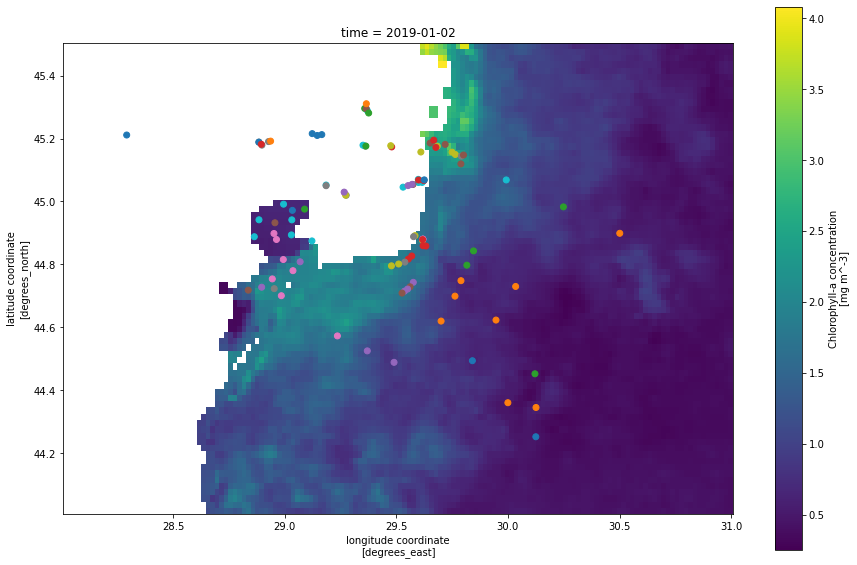

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
cmems_ds.CHL.isel(time=1).sel({'lat': slice(44.0, 45.5), 'lon': slice(28, 31)}).plot(ax=ax) # Plot the raster data on the same subplot
danube_delta_gdf.plot(column="chl-a[mg/m3]", ax=ax)    # Plot the vector data on the subplot